In [3]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
import pandas as pd
%matplotlib inline

In [4]:
X,y=make_blobs(n_features=2,random_state=23,centers=3,n_samples=1000)

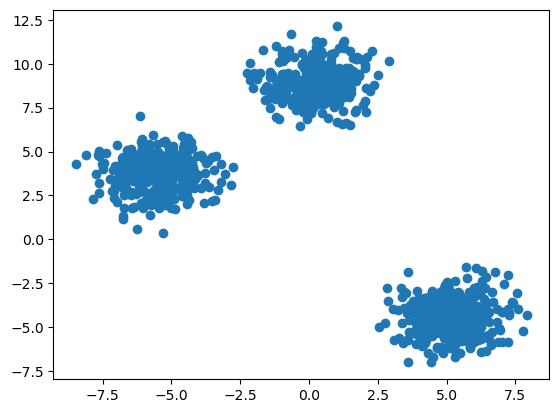

In [8]:
plt.scatter(X[:,0],X[:,1])

In [9]:
from sklearn.model_selection import train_test_split as tts

In [12]:
Xtr,Xte,ytr,yte=tts(X,y,random_state=42,test_size=0.33)

In [13]:
from sklearn.cluster import KMeans

In [14]:
#Manual Process to select the k value
#Elbow method
import warnings as wn
wn.filterwarnings('ignore')

In [15]:
wcss=[]
for k in range(1,11):
    km=KMeans(n_clusters=k,init='k-means++')
    km.fit(Xtr)
    wcss.append(km.inertia_)

In [16]:
wcss

[34827.57682552022,
 7935.4372861454185,
 1319.2730531585607,
 1140.4677884655125,
 991.8899785187884,
 853.5608428374894,
 755.2854592293543,
 665.521904371793,
 579.7059868247698,
 534.5568914290288]

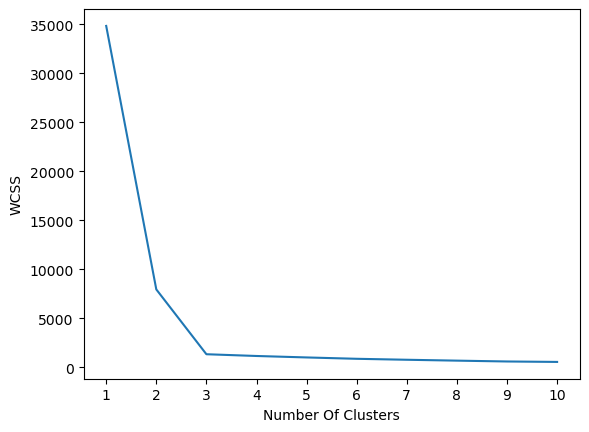

In [17]:
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel('Number Of Clusters')
plt.ylabel('WCSS')
plt.show()

In [25]:
km=KMeans(n_clusters=3,init='k-means++')

In [26]:
y_labels=km.fit_predict(Xtr)

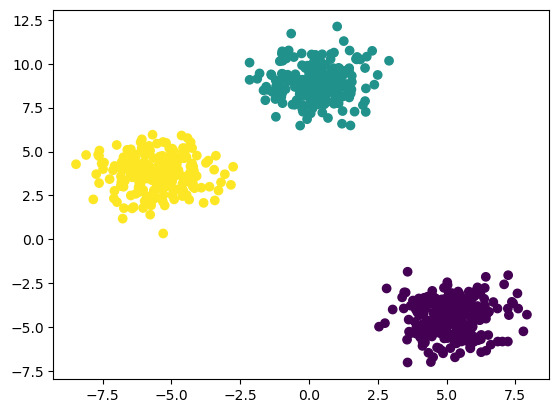

In [27]:
plt.scatter(Xtr[:,0],Xtr[:,1],c=y_labels)

In [28]:
#install kneed for auto k value

In [30]:
!pip install kneed

In [31]:
from kneed import KneeLocator

In [32]:
kl=KneeLocator(range(1,11),wcss,curve='convex',direction='decreasing')

In [34]:
kl.elbow

3

In [35]:
from sklearn.metrics import silhouette_score as ss

In [36]:
ss_score=[]
for k in range(2,11):
    kn=KMeans(n_clusters=k,init='k-means++')
    kn.fit(Xtr)
    scr=ss(Xtr,kn.labels_)
    ss_score.append(scr)

In [37]:
ss_score

[0.7281443868598331,
 0.8071181203797672,
 0.6357733426488265,
 0.48196009682399193,
 0.3321994964555899,
 0.3497193753105919,
 0.34309840567708566,
 0.34289345991287984,
 0.3433892876179294]